In [37]:
'''
Добрый день, дорогой участник курса!
Должно быть, ты читаешь эти строки, чтобы твою работу поскорей проверили.
Запускай окошки последовательно в директории с данными - и будет тебе счастье.
'''
#импортируем всё, что нужно для счастья
import time
import datetime
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas

#извлекаем признаки
features = pandas.read_csv('./features.csv', index_col='match_id')
#сохраним целевую переменную - победила или нет команда radiant
y=features.radiant_win

#Удалим всё, что не относится к первым пяти минутам
features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)

#features=features.drop(['duration','tower_status_radiant',
#                        'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)


#Проверяем наличие NaN значений. Если они есть, выведем информацию об этом
# list(df.columns.values) - список имён колонок 
for column_name in list(features.columns.values):
    if(features[column_name].count()!=features.shape[0]):
        print(column_name,' omits ',features.shape[0]-features[column_name].count(),' values;')

features.fillna(0,inplace=True)

first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;


In [ ]:
'''
Вывод после запуска окошка выше
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;

Ого, NaN значений действительно много! Для first_blood_player1 и first_blood_player2 можно сказать,
что данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. 

'''



#С NaN разобрались, заполним значение нулями. Кстати, заполнение большой величиной позволило повысить качество
#примерно на 0.2%. Пустячок, а приятно
features.fillna(0,inplace=True)

#Почти всё готово для предсказания, прогоним GradientBoostingClassifier со значениями 5, 10, 20, 30, 40

results=[]
times=[]
n_list=[5,10,20]
for n in n_list:
    start_time = datetime.datetime.now()
    results.append(getMetrics(n))
    times.append(datetime.datetime.now() - start_time)
    print('tree count: ',n,' roc_auc: ',results[-1],'time:',times[-1])
    

tree count:  5  roc_auc:  0.636930420883 time: 0:00:15.183741
tree count:  10  roc_auc:  0.666034026451 time: 0:00:25.906847


'\nВидно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.\nБудет полезнее улучшать данные.\nКраткий отчёт в одном месте:\n1. \nfirst_blood_time  omits  19553  values;\nfirst_blood_team  omits  19553  values;\nfirst_blood_player1  omits  19553  values;\nfirst_blood_player2  omits  43987  values;\nradiant_bottle_time  omits  15691  values;\nradiant_courier_time  omits  692  values;\nradiant_flying_courier_time  omits  27479  values;\nradiant_first_ward_time  omits  1836  values;\ndire_bottle_time  omits  16143  values;\ndire_courier_time  omits  676  values;\ndire_flying_courier_time  omits  26098  values;\ndire_first_ward_time  omits  1826  values;\nДля first_blood_player1 и first_blood_player2 можно сказать,\nчто данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. \n2. \nradiant_win\n3. \n74.91 секунды\n4. \nНет, не имеет, нужно улучшать предварительную обработку данных. Для ускорения обучения можно использовать\nне

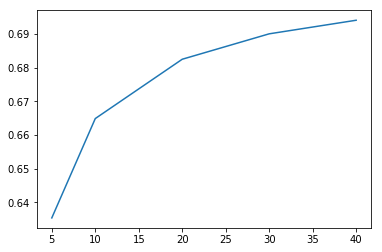

In [7]:
'''
У меня получились следующие результаты:

tree count:  5  roc_auc:  0.635357433114 time: 0:00:15.376037
tree count:  10  roc_auc:  0.664850687975 time: 0:00:26.363707
tree count:  20  roc_auc:  0.682461876804 time: 0:00:52.652367
tree count:  30  roc_auc:  0.690006471039 time: 0:01:14.910629
tree count:  40  roc_auc:  0.694038724512 time: 0:01:34.234331
'''

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(n_list,results)
'''
Видно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.
Будет полезнее улучшать данные.
Краткий отчёт в одном месте:
1. 
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;
Для first_blood_player1 и first_blood_player2 можно сказать,
что данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. 
2. 
radiant_win
3. 
74.91 секунды
4. 
Нет, не имеет, нужно улучшать предварительную обработку данных. Для ускорения обучения можно использовать
не всю выборку, а лишь некоторое случайное подмножество или уменьшить глубину деревьев

'''

In [200]:
'''
Функция, инкапсулирующая в себе обучение, кросс-валидацию и подсчёт метрики
'''
def getMetrics(X,y,n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=GradientBoostingClassifier(n_estimators=n, random_state=42)
    for train,test in kf.split(X,y):
        clf.fit(X.iloc[train],y.iloc[train])
        pred=clf.predict_proba(X.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;
#То же самое, но логистическая регрессия
def getLogMetrics(X,y,n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=LogisticRegression(C=n,penalty='l2')
    for train,test in kf.split(X,y):
        clf.fit(X.iloc[train],y.iloc[train])
        pred=clf.predict_proba(X.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

In [41]:
'''
Время логистической регрессии! Данные у нас уже получены и обработаны, можно сразу учить
'''
results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(c))
    times.append(datetime.datetime.now() - start_time)
    print('С: ',c,' roc_auc: ',results[-1],'time:',times[-1])


tree count:  1e-05  roc_auc:  0.695161634615 time: 0:00:09.526800
tree count:  0.0001  roc_auc:  0.711357660277 time: 0:00:14.344206
tree count:  0.001  roc_auc:  0.71636350817 time: 0:00:32.524141
tree count:  0.01  roc_auc:  0.71655026125 time: 0:00:42.701399
tree count:  0.1  roc_auc:  0.716527148665 time: 0:00:49.594313
tree count:  1  roc_auc:  0.716522602481 time: 0:00:45.987427
tree count:  10  roc_auc:  0.716522288896 time: 0:00:47.728955
tree count:  100  roc_auc:  0.716522295258 time: 0:00:48.235347
tree count:  1000  roc_auc:  0.716522322796 time: 0:00:46.875327
tree count:  10000  roc_auc:  0.716522329151 time: 0:00:43.930897
tree count:  100000  roc_auc:  0.716522329151 time: 0:00:44.900973


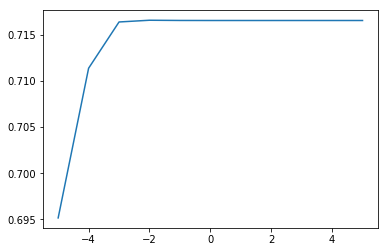

In [54]:
'''
Как видим, значения примерно равные:
tree count:  1e-05  roc_auc:  0.695161634615 time: 0:00:09.526800
tree count:  0.0001  roc_auc:  0.711357660277 time: 0:00:14.344206
tree count:  0.001  roc_auc:  0.71636350817 time: 0:00:32.524141
tree count:  0.01  roc_auc:  0.71655026125 time: 0:00:42.701399
tree count:  0.1  roc_auc:  0.716527148665 time: 0:00:49.594313
tree count:  1  roc_auc:  0.716522602481 time: 0:00:45.987427
tree count:  10  roc_auc:  0.716522288896 time: 0:00:47.728955
tree count:  100  roc_auc:  0.716522295258 time: 0:00:48.235347
tree count:  1000  roc_auc:  0.716522322796 time: 0:00:46.875327
tree count:  10000  roc_auc:  0.716522329151 time: 0:00:43.930897
tree count:  100000  roc_auc:  0.716522329151 time: 0:00:44.900973
'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(np.log10(c_list),results)

In [64]:
'''
Удалим 11 категориальных признаков
'''
features=features.drop(['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero',\
                        'r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)


In [65]:
'''
Время логистической регрессии! Данные у нас уже получены и обработаны, можно сразу учить
'''
results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(c))
    times.append(datetime.datetime.now() - start_time)
    print('С: ',c,' roc_auc: ',results[-1],'time:',times[-1])


tree count:  1e-05  roc_auc:  0.695100142614 time: 0:00:09.105484
tree count:  0.0001  roc_auc:  0.711339114083 time: 0:00:11.819431
tree count:  0.001  roc_auc:  0.716375791435 time: 0:00:21.188096
tree count:  0.01  roc_auc:  0.71655938009 time: 0:00:27.032233
tree count:  0.1  roc_auc:  0.716534240347 time: 0:00:29.521026
tree count:  1  roc_auc:  0.716530363451 time: 0:00:29.675514
tree count:  10  roc_auc:  0.716529971503 time: 0:00:29.508858
tree count:  100  roc_auc:  0.716529891006 time: 0:00:30.369345
tree count:  1000  roc_auc:  0.716529888885 time: 0:00:30.040128
tree count:  10000  roc_auc:  0.71652988465 time: 0:00:29.577286
tree count:  100000  roc_auc:  0.71652988465 time: 0:00:29.782419


r1_hero 108
d1_hero 108
r2_hero 108
d2_hero 108
r3_hero 108
d3_hero 108
r4_hero 108
d4_hero 108
r5_hero 108
d5_hero 108


'\nВ игре существует 108 персонажей\n'

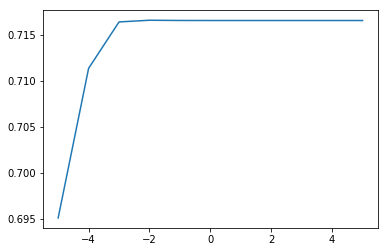

In [108]:
'''
Хмм, результаты очень похожи:
tree count:  1e-05  roc_auc:  0.695100142614 time: 0:00:09.105484
tree count:  0.0001  roc_auc:  0.711339114083 time: 0:00:11.819431
tree count:  0.001  roc_auc:  0.716375791435 time: 0:00:21.188096
tree count:  0.01  roc_auc:  0.71655938009 time: 0:00:27.032233
tree count:  0.1  roc_auc:  0.716534240347 time: 0:00:29.521026
tree count:  1  roc_auc:  0.716530363451 time: 0:00:29.675514
tree count:  10  roc_auc:  0.716529971503 time: 0:00:29.508858
tree count:  100  roc_auc:  0.716529891006 time: 0:00:30.369345
tree count:  1000  roc_auc:  0.716529888885 time: 0:00:30.040128
tree count:  10000  roc_auc:  0.71652988465 time: 0:00:29.577286
tree count:  100000  roc_auc:  0.71652988465 time: 0:00:29.782419
'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(np.log10(c_list),results)

'''
На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero,
которые показывают, какие именно герои играли за каждую команду.
Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще,
чем другие. Выясните из данных, сколько различных идентификаторов героев существует
в данной игре (вам может пригодиться фукнция unique или value_counts).
Что ж, мы снесли эти признаки - восстановим их
'''

features = pandas.read_csv('./features.csv', index_col='match_id')
y=features.radiant_win

features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
features.fillna(0,inplace=True)
#Масштабируем признаки
#for column in features.columns.values:
#    features[column]=(features[column]-features[column].mean())/features[column].std()
#Выводим количество уникальных значений
for M in ['1','2','3','4','5']:
    for team in ['r','d']:
        col_name=team+M+'_hero'
        print(col_name,len(features[col_name].unique()))
'''
В игре существует 108 персонажей
'''

In [226]:
#Воспользуемся копипастой
X_pick = np.zeros((features.shape[0], 113))
for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]] = -1


In [224]:
X_pick[:,0]=features.index
X_df=pandas.DataFrame(X_pick)
X_df.set_index(0)
X_df=X_df.rename(columns={0:'index'})
X_df=X_df.set_index('index')
new_features=features.join(X_df,how='right')

In [203]:
#Давайте учиться на новых данных!
for column in features.columns.values:
    new_features[column]=(new_features[column]-new_features[column].mean())/new_features[column].std()
results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(new_features,y,c))
    times.append(datetime.datetime.now() - start_time)
    print('C: ',c,' roc_auc: ',results[-1],'time:',times[-1])


C:  1e-05  roc_auc:  0.699255143116 time: 0:00:19.157101
C:  0.0001  roc_auc:  0.725058364852 time: 0:00:21.694439
C:  0.001  roc_auc:  0.746326094466 time: 0:00:36.329841
C:  0.01  roc_auc:  0.751694061887 time: 0:00:59.265166
C:  0.1  roc_auc:  0.751899843229 time: 0:01:23.692678
C:  1  roc_auc:  0.75188333732 time: 0:01:28.188740
C:  10  roc_auc:  0.75188057853 time: 0:01:24.858486
C:  100  roc_auc:  0.7518803518 time: 0:01:17.236978
C:  1000  roc_auc:  0.751880322078 time: 0:01:31.259121
C:  10000  roc_auc:  0.751880201347 time: 0:01:29.224473
C:  100000  roc_auc:  0.751880366606 time: 0:01:33.056952


In [213]:
'''
Ого, +4%!
C:  1e-05  roc_auc:  0.699255143116 time: 0:00:19.157101
C:  0.0001  roc_auc:  0.725058364852 time: 0:00:21.694439
C:  0.001  roc_auc:  0.746326094466 time: 0:00:36.329841
C:  0.01  roc_auc:  0.751694061887 time: 0:00:59.265166
C:  0.1  roc_auc:  0.751899843229 time: 0:01:23.692678
C:  1  roc_auc:  0.75188333732 time: 0:01:28.188740
C:  10  roc_auc:  0.75188057853 time: 0:01:24.858486
C:  100  roc_auc:  0.7518803518 time: 0:01:17.236978
C:  1000  roc_auc:  0.751880322078 time: 0:01:31.259121
C:  10000  roc_auc:  0.751880201347 time: 0:01:29.224473
C:  100000  roc_auc:  0.751880366606 time: 0:01:33.056952
'''
auc_roc=0;
kf=KFold(n_splits=5,shuffle=True,random_state=42)
clf=LogisticRegression(C=1,penalty='l2')
for train,test in kf.split(new_features,y):
    clf.fit(new_features.iloc[train],y.iloc[train])
    pred=clf.predict_proba(new_features.iloc[test])[:,1]
    auc_roc+=roc_auc_score(y.iloc[test],pred)
    print(auc_roc)
print(auc_roc/5)

0.749352982152
1.502481495
2.25184959151
3.00791833814
3.7594166866
0.75188333732


In [225]:
clf

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [231]:
features

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0
